# Part 1: Binning degree distributions


### Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.


In [1]:
import random as rd

SEED = 1234
rd.seed(SEED)

MEAN = 2
STD_DEV = 0.125
data_points = [rd.gauss(MEAN, STD_DEV) for _ in range(5000)]

  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?

In [2]:
import numpy as np

BINS = 10
hist, bin_edges = np.histogram(data_points, bins=BINS)

print("numpy.histogram returns the counts of data points that fall into each bin:\n", hist, 
      "\nand edges of the bins:\n", bin_edges, "\n")

print("The list of data points is shorter:", len(hist), 
      "values, while the edges of the bins have", len(bin_edges), "values.")

numpy.histogram returns the counts of data points that fall into each bin:
 [  21  115  435  952 1321 1192  654  262   44    4] 
and edges of the bins:
 [1.58360558 1.67143554 1.7592655  1.84709546 1.93492542 2.02275538
 2.11058535 2.19841531 2.28624527 2.37407523 2.46190519] 

The list of data points is shorter: 10 values, while the edges of the bins have 11 values.


  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.


> **Solution**: The `matplotlib.pyplot.plot` get as inputs the values for an X axis and the values for a Y axis, which need to be the same length. However, `numpy.histogram` returns two arrays: one with the count of the number of values in K intervals and an array with K+1 values that define the edges of said intervals. Then, we need to select a number to represent the interval, which can be done in many different ways, but we chose to just get the minimum edge value. So, we exclude the maximum value of the array, which is not the minimum of any interval.

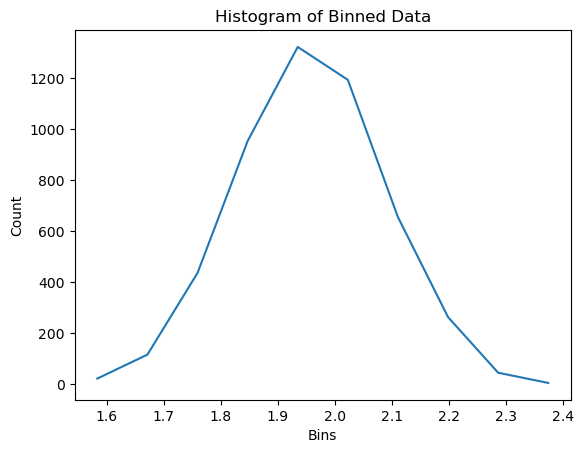

In [3]:
import matplotlib.pyplot as plt

plt.plot(bin_edges[:-1], hist)
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Histogram of Binned Data')
plt.show()

> **Solution**: The histogram plot shows the distribution of the data points. The x-axis represents the bins, which are intervals that group the data points, and the y-axis represents the count of data points falling into each bin.

### Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. 

       * Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  

In [4]:
import numpy as np
SEED = 1234
np.random.seed(SEED)

LAMBDA = 10
COUNT = 5000
random_numbers = np.random.poisson(lam=LAMBDA, size=COUNT)

print("Maximum value:", np.max(random_numbers))
print("Minimum value:", np.min(random_numbers))

Maximum value: 24
Minimum value: 1


* Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 

    * Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). 

    * Use the vector by setting `numpy.histogram`'s `bins` parameter as `bins = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  

> **Solution**: The first element should be the minimum possible value for the Poisson distribution, which is 0.
The last element should be a high number that covers a sufficient range of values. In this case, maximum value is used. `numpy.arange` excludes the upper range, so one must be added to get the maximum value.

In [5]:
v = np.arange(0, random_numbers.max() + 1)

hist, bin_edges = np.histogram(random_numbers, bins=v)

print("Sum over bin counts:", np.sum(hist))

Sum over bin counts: 5000


* Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution. 


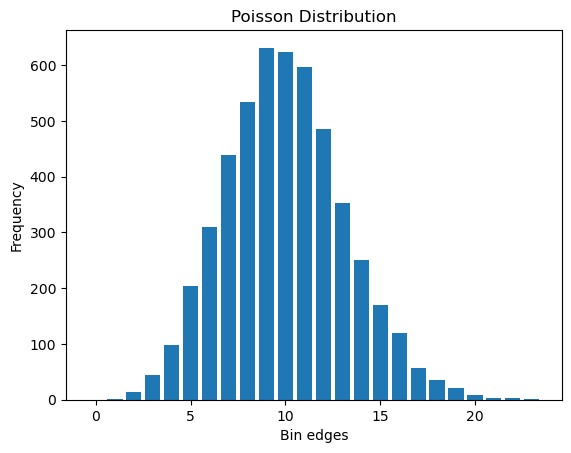

In [6]:
import matplotlib.pyplot as plt

plt.bar(bin_edges[:-1], hist)
plt.xlabel('Bin edges')
plt.ylabel('Frequency')
plt.title('Poisson Distribution')
plt.show()

> **Solution**: Bar plot that displays the frequency of random numbers generated from a Poisson distribution with a lambda value of 10.

### Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
  
    * First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 

    * **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  

In [7]:
K = 10
N = 5000
p = K / (N - 1) 

* Now, use `networkx` to create the graph and extract the degree distribution.

In [8]:
import networkx as nx

SEED = 1234
G = nx.erdos_renyi_graph(N, p, seed=SEED)
degree_count = nx.degree_histogram(G)

* Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

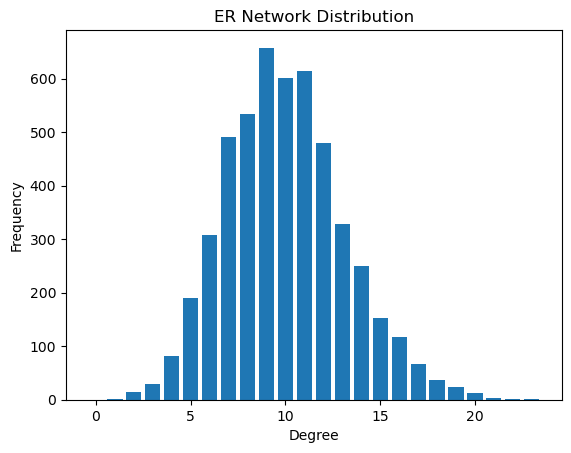

In [9]:
import matplotlib.pyplot as plt

plt.bar(range(len(degree_count)), degree_count)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title('ER Network Distribution')
plt.show()

> **Solution**: Bar plot that represents the degree distribution of the generated Erdos-Rényi random graph.

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.


### Task
Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = $10^{–3}$.

- What is the expected number of links, 〈L〉?

In [10]:
import networkx as nx

SEED = 1234
NODE_COUNT = 3000
p = 10**-3
G = nx.erdos_renyi_graph(NODE_COUNT, p, seed=SEED)

# Edges = links
expected_edges = NODE_COUNT*(NODE_COUNT-1)/2 * p # number of possible nodes * probability
actual_edges = nx.number_of_edges(G)

print(f"expected edges: {expected_edges}, actual edges: {actual_edges}")

expected edges: 4498.5, actual edges: 4575


- In which regime is the network?

In [11]:
from math import log

connected = nx.is_connected(G)
k_avg = sum(dict(G.degree()).values()) / len(G)

print(f"<k>={k_avg} & ln(N)={log(NODE_COUNT)}")

response = ""

if 0 < k_avg < 1:
    response += "The network is in the subcritical regime "
elif k_avg == 1:
    response += "The network is in the critical point regime "
elif k_avg > 1:
    response += "The network is in the supercritical regime"
elif k_avg > log(NODE_COUNT):
    response += "The network is in the connected regime"
response +=  " and is "
if connected:
    response += ""
else:
    response += "not "
response += "connected."
print(response)

<k>=3.05 & ln(N)=8.006367567650246
The network is in the supercritical regime and is not connected.


- Calculate the probability $p_c$ so that the network is at the critical point.

In [12]:
p_c = 1 / (NODE_COUNT - 1)  # book eq. 3.11
print(f"The link probability p for this network to be at the critical point is: {p_c}")

The link probability p for this network to be at the critical point is: 0.00033344448149383126


**Reference**: The equation $p_c = \frac{1}{N - 1} \hspace{0.3cm} (3.11)$ can be found in the book's [chapter 3](http://networksciencebook.com/chapter/3#evolution-network) .

- Given the linking probability p = $10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

> We are going to deduce how to calculate $N_{cr}$ from $p$. From the book:
> We know that $\langle k \rangle = p(N-1)$ and that one supercomponent should accure for $\langle k \rangle > \ln{N}$ thus
> $$ p > ln(N) / (N-1)  \rightarrow 0 > ln(N)/(N-1) - p $$ 
>
> So, if we're searching for $N_{cr}$, we solve for it in the next equation:
> $$ 0 = ln(N_{cr})/(N_{cr}-1) - p \rightarrow 0 = ln(N_{cr})/(N_{cr}-1) - 10^{-3} $$

In [13]:
from scipy.optimize import fsolve
from math import log, ceil

# Define the value of p
p = 10**-3

equation = lambda x: log(x[0]) / (x[0] - 1)- p

# Use fsolve to find the root, starting from an initial guess of 3000
N_cr = fsolve(equation, 3000)
N_cr = ceil(N_cr[0])
print(f"From N_cr = {N_cr} nodes, the graph should be connected.")

From N_cr = 9120 nodes, the graph should be connected.


>We can check the previous result repeating the same process than in the first section of this exercise.

In [14]:
G = nx.erdos_renyi_graph(N_cr, p, seed=SEED)
if nx.is_connected(G):
    print("Correct, the graph is indeed connected.")
else:
    print("Error, solved incorrectly: the graph is not connected.")

Correct, the graph is indeed connected.


- For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [15]:
average_degree_cr = sum(dict(G.degree()).values()) / G.number_of_nodes()

print("Average degree ⟨kcr⟩:", average_degree_cr)

try:
    average_distance = nx.average_shortest_path_length(G)

    print("Average distance ⟨d⟩:", average_distance)
except:
    print("Graph is not connected, so we cannot calculate average shortest patch")

Average degree ⟨kcr⟩: 9.157017543859649
Average distance ⟨d⟩: 4.373356189025036


- Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

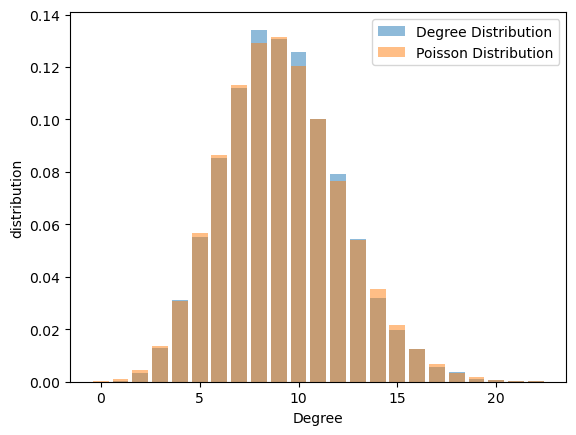

In [16]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math

def p_poisson(k, average_degree):
    return math.exp(-average_degree) * ((average_degree ** k) / math.factorial(k))

degrees = dict(G.degree())
degree_counts = defaultdict(int)

for degree in degrees.values():
    degree_counts[degree] += 1

TOTAL_NODES = len(G)
degree_distribution = {k: v / TOTAL_NODES for k, v in degree_counts.items()}

poisson_distribution = {k: p_poisson(k, average_degree_cr) for k in range(max(degree_counts.keys()) + 1)}

plt.bar(degree_distribution.keys(), degree_distribution.values(), alpha=0.5, label='Degree Distribution')
plt.bar(poisson_distribution.keys(), poisson_distribution.values(), alpha=0.5, label='Poisson Distribution')
plt.xlabel('Degree')
plt.ylabel('distribution')
plt.legend()
plt.show()


We can see that degree distribution is very similar to the Poisson distribution, The diffrences are from random nature of creating the network.

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  

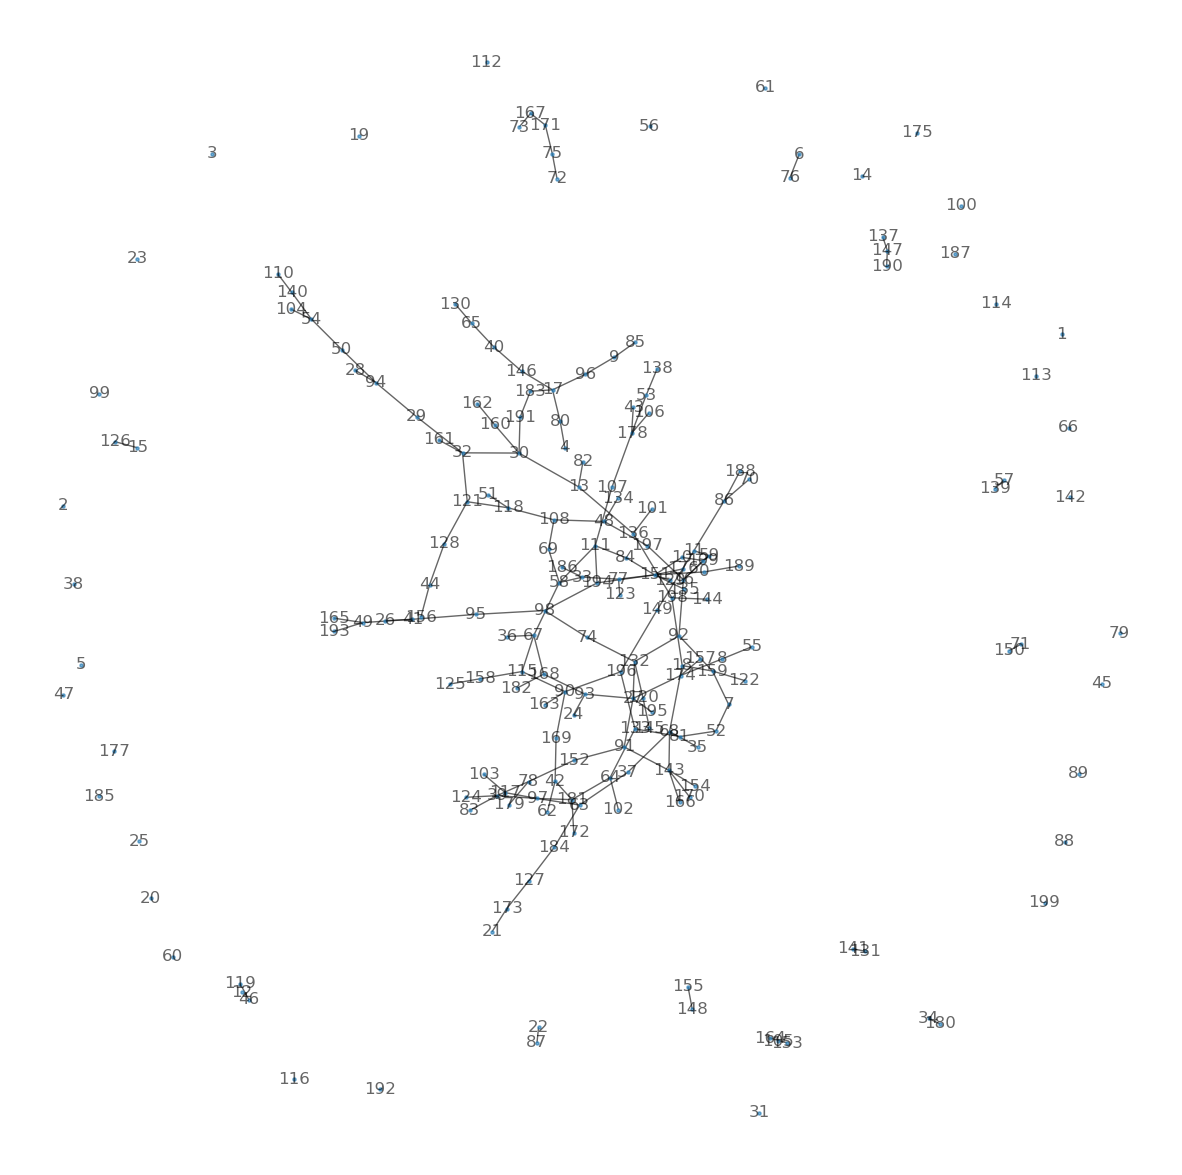

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

SEED = 1234

K_AVG = 1.5
N = 200
p = K_AVG / (N-1)

G = nx.fast_gnp_random_graph(N, p, seed=SEED)

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, node_size=5, alpha=0.6)
plt.axis("off")
plt.show()

* Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)


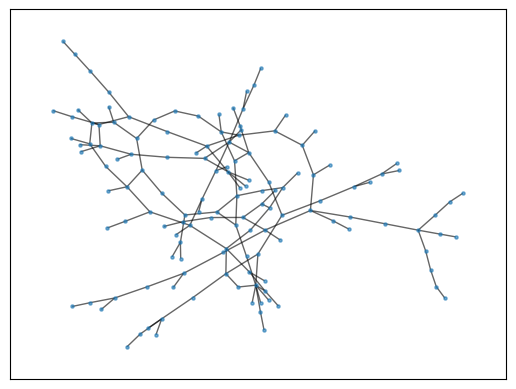

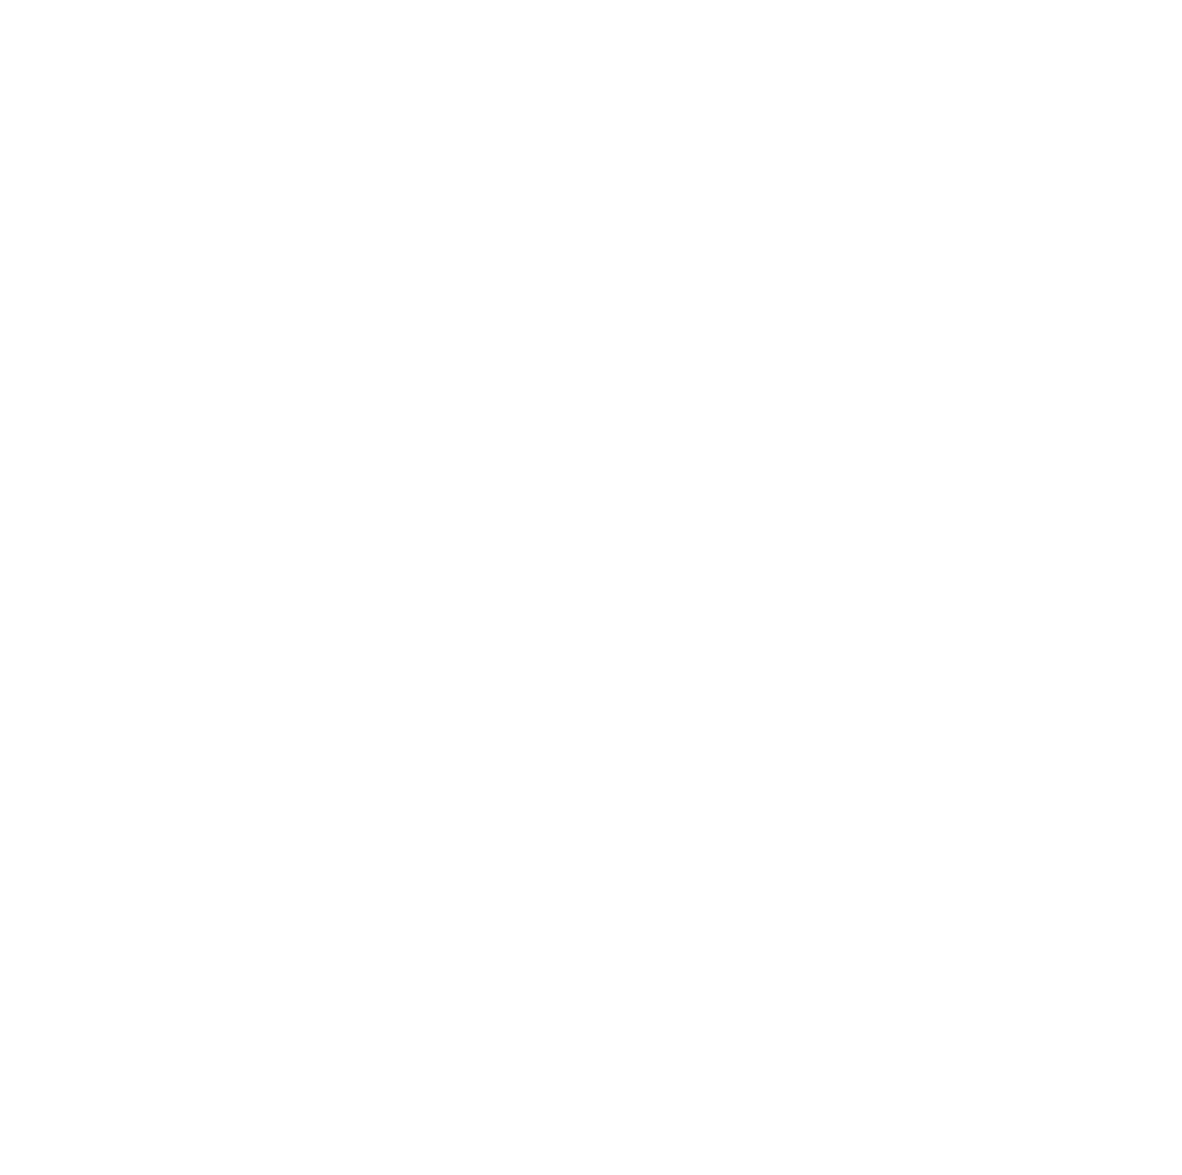

In [18]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Graph_gcc = G.subgraph(Gcc[0])
nx.draw_networkx(Graph_gcc, node_size=5, alpha=0.6, with_labels=False)
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.show()

  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  

In [19]:
import random as rd

gcc_nodes = list(Graph_gcc.nodes())

rd.seed(SEED)
random_node = rd.choice(gcc_nodes)

print(random_node)

165


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.



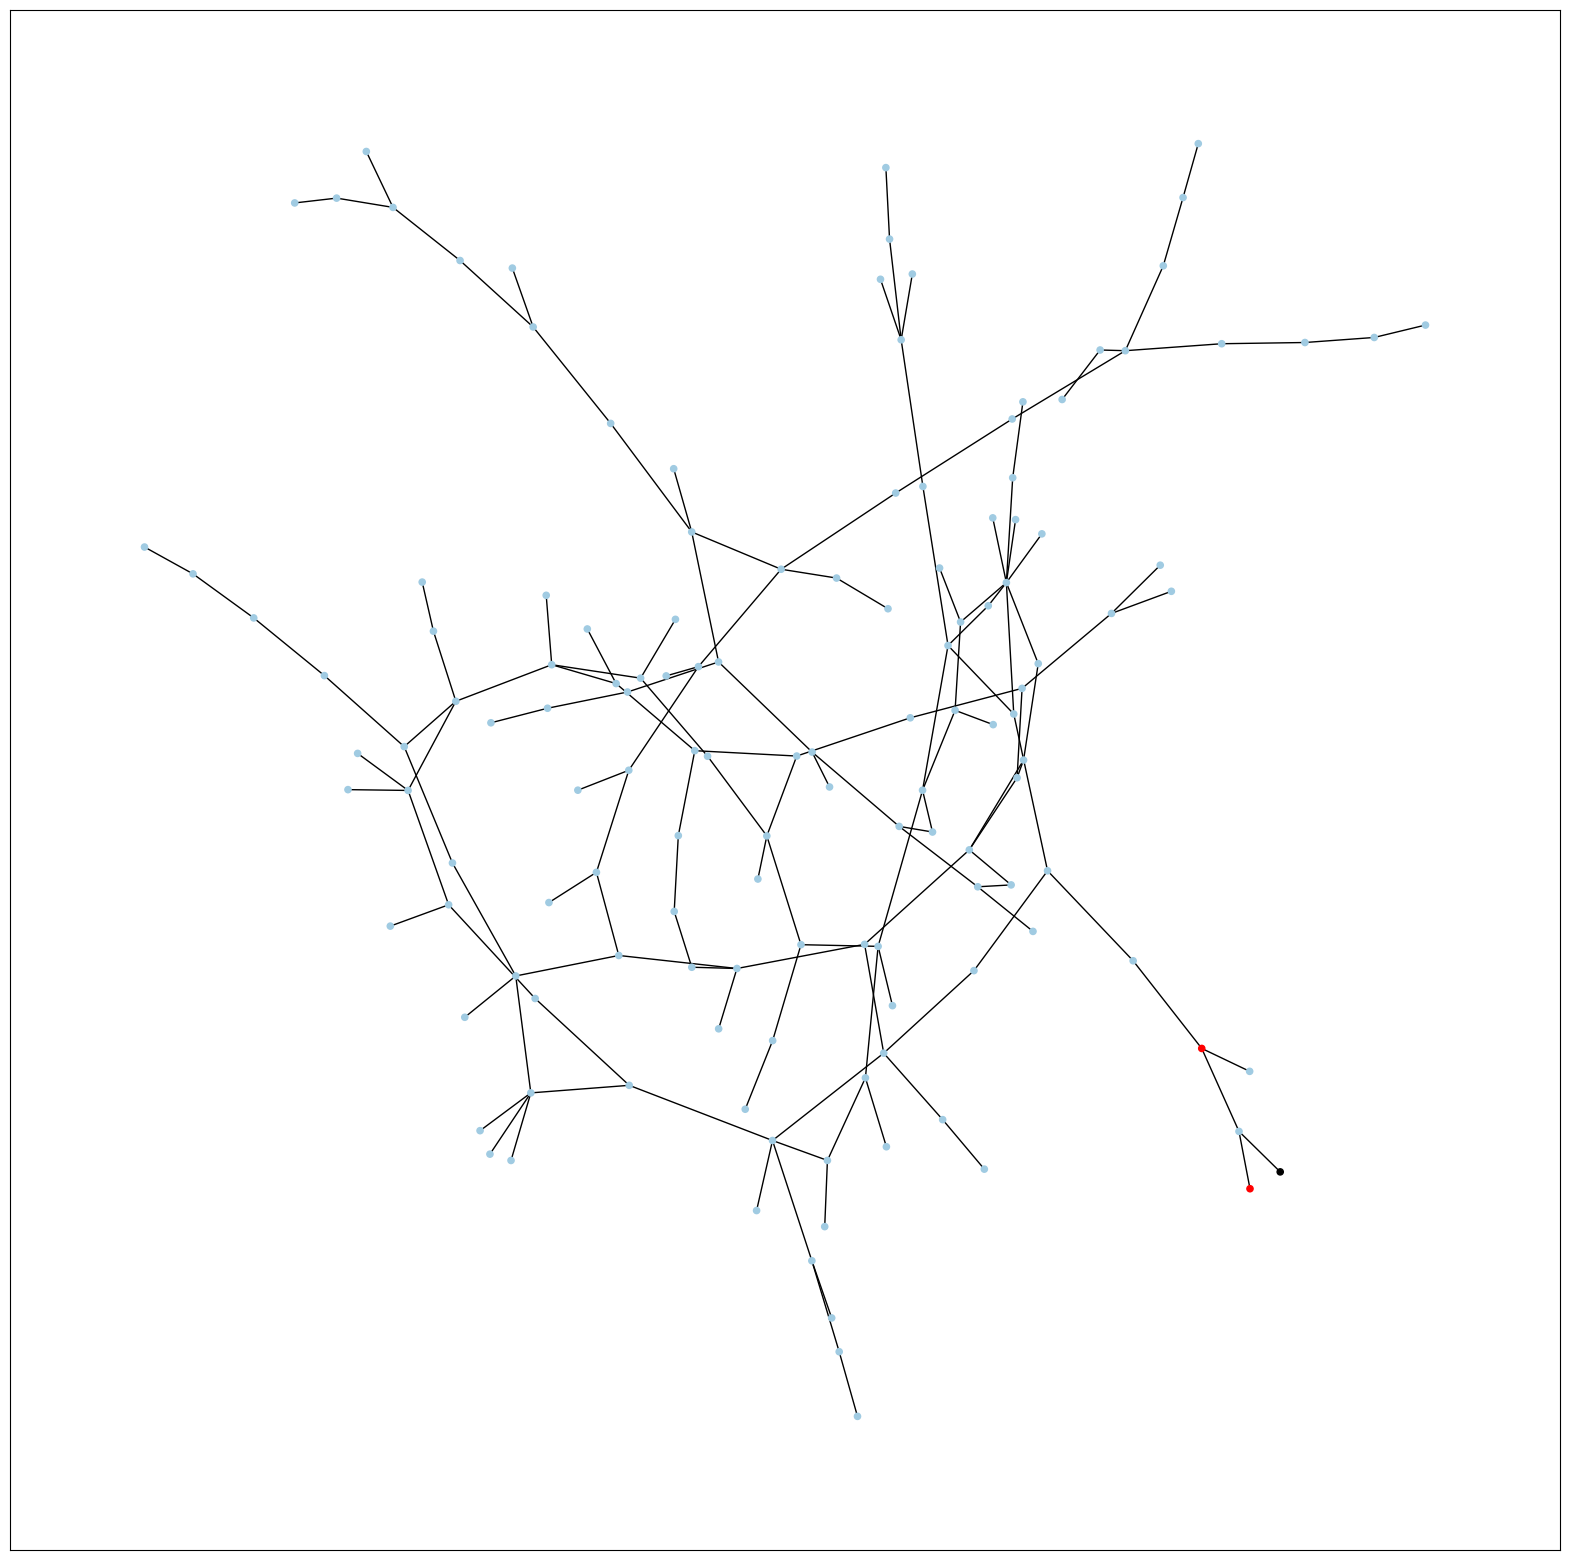

In [20]:
node_colors = {}

node_colors[random_node] = "#000000"

paths = nx.single_source_shortest_path_length(Graph_gcc, random_node, cutoff=2)
for node, length in paths.items():
    if node not in node_colors and length == 2:
        node_colors[node] = "#ff0000"

for node in Graph_gcc.nodes():
    if node not in node_colors:
        node_colors[node] = "#A0CBE2"
        
plt.figure(figsize=(20, 20))
nx.draw_networkx(Graph_gcc, node_color=[node_colors[node] for node in Graph_gcc.nodes()], node_size = 20, with_labels=False)

plt.show()


By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


In [21]:
SEED = 1234
N = 500
K_AVG = 4
P_LIST = [0, 0.1, 1]
graphs = [None for _ in range(len(P_LIST))]
d_avg = [None for _ in range(len(P_LIST))]

import networkx as nx

for i in range(len(P_LIST)):
    graphs[i] = nx.watts_strogatz_graph(n=N,k=K_AVG,p=P_LIST[i],seed=SEED)
    d_avg[i] = nx.average_shortest_path_length(graphs[i])

from math import log
d_avg_theory = log(N)/log(K_AVG)
print(f"Average shortest path length for each p:")
for i in range(len(P_LIST)):
    print(f"\tp = {P_LIST[i]}:  \t<d> = {d_avg[i]}")
print(f"Practical <d> vs theoretical <d>: {d_avg[2]} and {d_avg_theory}")

Average shortest path length for each p:
	p = 0:  	<d> = 62.875751503006015
	p = 0.1:  	<d> = 7.542917835671343
	p = 1:  	<d> = 4.763647294589179
Practical <d> vs theoretical <d>: 4.763647294589179 and 4.4828921423310435


> **Solution**: When $p = 1$ the average shortest path is the shortest and is the closest to reproducing the $\langle d \rangle$'s theoritical value in random networks, thereby presenting the *small world* property. 

* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [22]:
from numpy import std
import networkx as nx

SEED = 1234
N_NETWORKS = 50
N = 500
K_AVG = 4
P_LIST = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
d_avg = [None for _ in range(len(P_LIST))]
d_avg_avg = [None for _ in range(len(P_LIST))]
d_avg_std = [None for _ in range(len(P_LIST))]

for i in range(len(P_LIST)):
    d_avg[i] = [-1 for _ in range(N_NETWORKS)]
    for j in range(N_NETWORKS):
        G = nx.watts_strogatz_graph(n=N,k=K_AVG,p=P_LIST[i],seed=SEED+j)
        d_avg[i][j] = nx.average_shortest_path_length(G)
    d_avg_avg[i] = sum(d_avg[i])/N_NETWORKS
    d_avg_std[i] = std(d_avg[i])

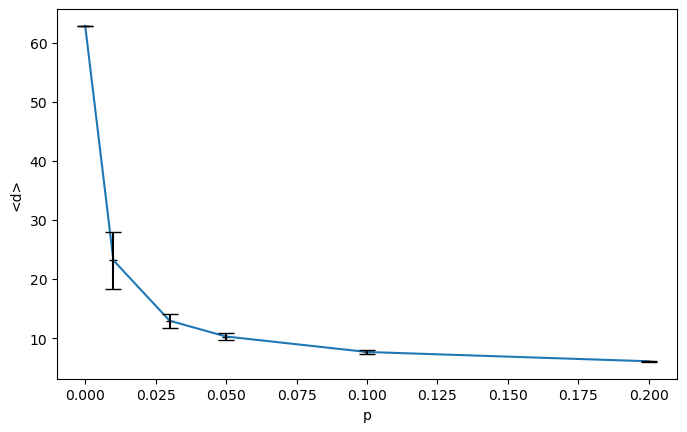

In [23]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1)
fig.set_figwidth(8)

ax1.plot(P_LIST, d_avg_avg)
ax1.set_xlabel("p")
ax1.set_ylabel("<d>")
for i in range(len(P_LIST)):
    ax1.errorbar(P_LIST[i], d_avg_avg[i], yerr=d_avg_std[i], barsabove = True, fmt='k_', capsize=6)

> **Solution**: We can see that for $p$ between 0 and 0.01 there's the steepest descent in $\langle d \rangle$, so that also causes a bigger $\sigma$. Furthermore, when the $\langle d \rangle$ values change less, there's a smaller error margin.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

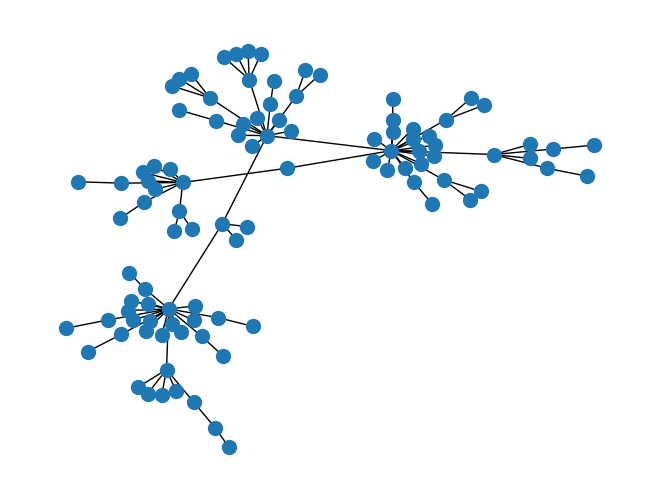

In [24]:
import networkx as nx
import random as rd

SEED = 1234
rd.seed(SEED)
G = nx.Graph()
G.add_edge(1, 2) # Add first edge separately to ensure it has weight

for i in range(3, 101):
    G.add_node(i)
    
    nodes = list(G.nodes())
    degrees = [G.degree(n) for n in nodes]

    chosen_node = rd.choices(nodes, degrees, k=1)[0]
    G.add_edge(i, chosen_node)

pos = nx.spring_layout(G, seed=SEED)
nx.draw(G, pos, node_size=100)
BA_d = G.degree

> **Solution**: The graph shows the Barabasi-Albert preferential attachment model, where nodes are added one at a time and connected to existing nodes based on their degree. It is displayed using the spring layout algorithm, arranging nodes according to attractive and repulsive forces.

* Now create a 5000 node network.
  * What's the maximum and minimum degree?

In [25]:
import networkx as nx
import random as rd

SEED = 1234
rd.seed(SEED)

G = nx.Graph()
G.add_edge(1, 2)

for i in range(3, 5001):
    G.add_node(i)
    
    nodes = list(G.nodes())
    degrees = [G.degree(n) for n in nodes]

    chosen_node = rd.choices(nodes, degrees, k=1)[0]
    G.add_edge(i, chosen_node)

degrees = [G.degree(n) for n in G.nodes()]

print("Maximum degree:", max(degrees))
print("Minimum degree:", min(degrees))

Maximum degree: 125
Minimum degree: 1


  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

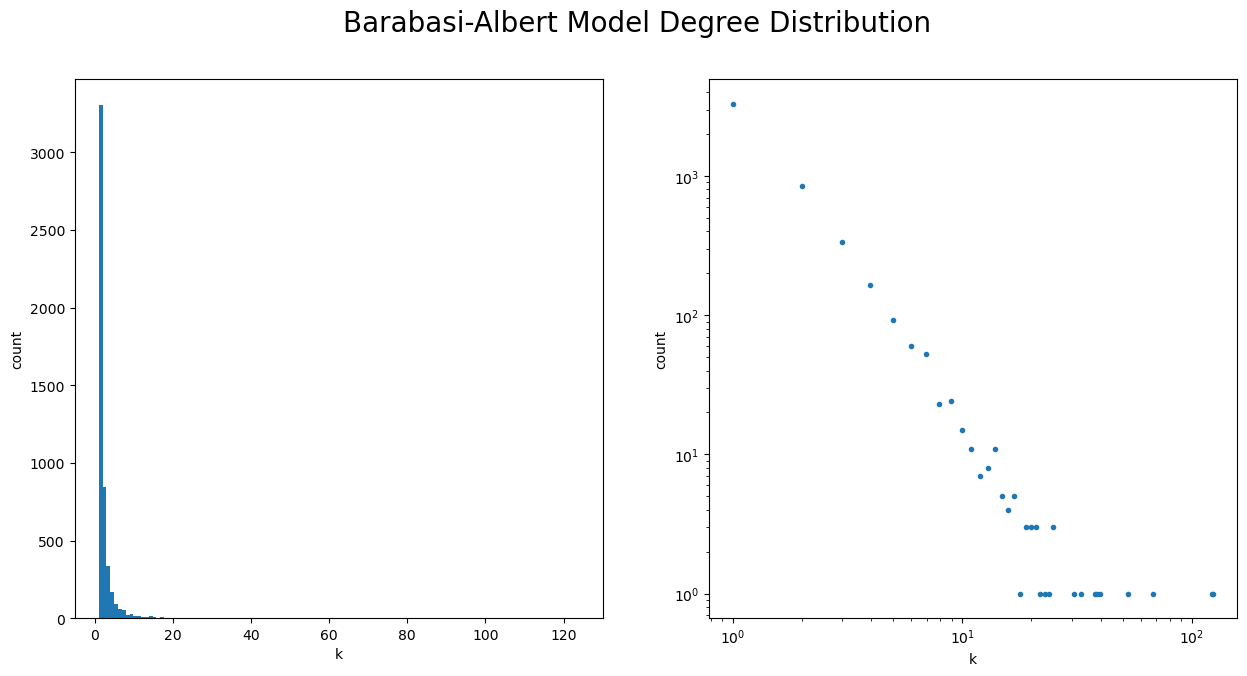

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N_BINS = 125

frq, edges = np.histogram(a=list(degrees), bins=N_BINS)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.suptitle("Barabasi-Albert Model Degree Distribution", fontsize=20)
fig.set_figheight(7)
fig.set_figwidth(15)

ax1.hist(edges[:-1], N_BINS, weights=frq)
ax1.set_xlabel("k")
ax1.set_ylabel("count");

ax2.plot(edges[:-1], frq, marker=".", linestyle='none')
ax2.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax2.set_xlabel("k")
ax2.set_ylabel("count")

plt.show()


> **Solution**: The histogram shows the distribution of the degrees (k) in the model, with the x-axis representing the degree values and the y-axis representing the count of nodes with each degree. The line plot shows the same distribution on a logarithmic scale, to visualize the distribution more clearly.

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?


In [27]:
import random as rd
import numpy as np

SEED = 1234
rd.seed(SEED)

true_per_1000 = 0
TOTAL_NODES = 1000

for _ in range(TOTAL_NODES):
    i = rd.choice(list(G.nodes))
    i_degree = G.degree(i)
    i_avg_neighbors_degree = np.mean([G.degree(node) for node in G.neighbors(i)])
    true_per_1000 += i_degree < i_avg_neighbors_degree

# Print summary
print(f"Out of {TOTAL_NODES} nodes sampled, {true_per_1000} had a degree smaller than the average degree of their neighbors.")

Out of 1000 nodes sampled, 865 had a degree smaller than the average degree of their neighbors.



Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [28]:
rd.seed(SEED)
G = nx.Graph()
G.add_edge(1, 2)

for i in range(3, 5001):
    G.add_node(i)
    
    nodes = list(G.nodes())
    
    chosen_node = rd.choice(nodes)
    G.add_edge(i, chosen_node)

d = dict(G.degree)

In [29]:
N = len(G.nodes)
edge_number = len(G.edges)
p = (2*edge_number)/(N* (N-1))

In [30]:
er_g = nx.erdos_renyi_graph(N, p, seed=SEED)

er_d = dict(er_g.degree)

Text(0.5, 0.98, 'Erdos-Renyi')

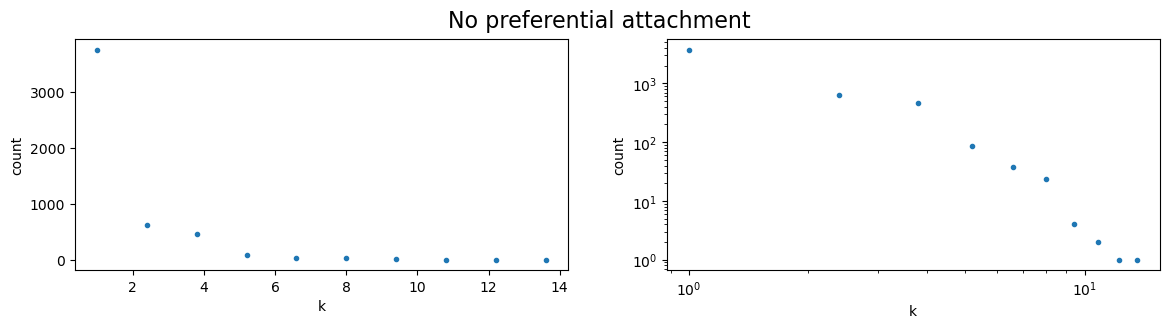

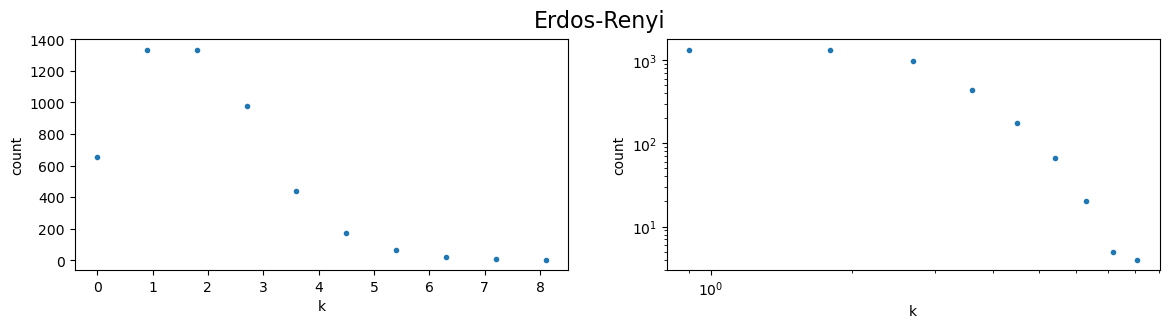

In [31]:
import numpy as np
N_BINS = 10
frq, edges = np.histogram(a= list(d.values()), bins=N_BINS)

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.set_figheight(3)
ax1.plot(edges[:-1], frq, marker=".", linestyle = 'none')
ax1.set_xlabel("k")
ax1.set_ylabel("count")

ax2.plot(edges[:-1], frq, marker=".", linestyle = 'none')
ax2.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax2.set_xlabel("k")
ax2.set_ylabel("count")

fig.suptitle('No preferential attachment', fontsize=16)

frq, edges = np.histogram(a= list(er_d.values()), bins=N_BINS)

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.set_figheight(3)
ax1.plot(edges[:-1], frq, marker=".", linestyle = 'none')
ax1.set_xlabel("k")
ax1.set_ylabel("count")

ax2.plot(edges[:-1], frq, marker=".", linestyle = 'none')
ax2.set_xscale('log', base=10)
ax2.set_yscale('log', base=10)
ax2.set_xlabel("k")
ax2.set_ylabel("count")

fig.suptitle('Erdos-Renyi', fontsize=16)

In [32]:
c = sum([1 for _ in nx.connected_components(G)])
er_c = sum([1 for _ in nx.connected_components(er_g)])
print(f"Number of connected components in the No preferential attachment vs Erdos-Renyi Network: {c} vs {er_c}")

Number of connected components in the No preferential attachment vs Erdos-Renyi Network: 6 vs 772


**Solution**: When we look at both types of networks, it's clear that they have different degree distributions. ER random graphs follow a Poisson distribution, while networks without preferential attachment have more nodes with a degree of 1 and some bigger hubs. 

Another key difference is in the connected components. In the first type of network, we mostly see a few large connected components. But in ER random graphs, there are many smaller, separate components.

These differences come from how the networks are built. In ER random graphs, each node has the same chance of having a degree \(k\). In networks without preferential attachment, we add nodes one at a time. This means that "older" nodes are more likely to have a higher degree \(k\).


# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3).

In [33]:
import random as rd

SEED = 1234
def configuration_model (degrees):
    
    halfedges = [] # a list of halfedges
    
    # Now append integer i to `halfedges` k times if the ith entry of degrees is equal to k:
    # STEP ONE GOES HERE..
    
    for i, k in enumerate(degrees):
        halfedges += [i for _ in range(k)]
        

    # STEP ONE ENDS HERE
    # print("Check if the following ouput matches what you expect 'halfedges' to look like")
    # print(halfedges)
    
    # Shuffle the list halfedges
    # STEP TWO GOES HERE..
    rd.Random(SEED).shuffle(halfedges)
    # STEP TWO ENDS HERE    
    
    # Append the resulting edges to the list `edgelist` as tuples 
    # [that is, append (i,j) if i and j should be connected by and edge]
    
    edgelist = [] # This will contain tuples (i,j) indicating edges between nodes i and j.    
    # STEP THREE GOES HERE..
    edgelist = [(halfedges[l*2],halfedges[l*2+1]) for l in range(int(len(halfedges)/2))]
    # STEP THREE ENDS HERE    

    return edgelist #Return list of tuples indicating edges

In [34]:
import matplotlib.pyplot as plt

edgelist = configuration_model(list(dict(BA_d).values()))
G = nx.from_edgelist(edgelist)
d = dict(G.degree)

* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

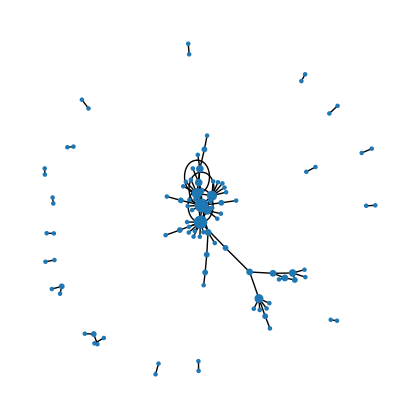

In [35]:
plt.figure(3,figsize=(4,4))
nx.draw(G, node_size=[v * 5 for v in d.values()])

> **Solution**: There are some loops and multilinks, when in the BA network there cannot be loops, but there can still be multilinks. Also, in this network we can see a lot of disconnected components, while there's only one big connected component in the BA network. This difference is due to the way both are constructed.

* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
N = 5000
degrees = [3 for _ in range(int(N/2))] + [5 for _ in range(int(N/2), N)]
edgelist = configuration_model(degrees)
G = nx.from_edgelist(edgelist)
d = dict(G.degree)

* What should the sum of node degrees be if all nodes had degrees as described in the exercise?

In [37]:
print(f"Theoretical total sum: {sum(degrees)}")

Theoretical total sum: 20000


> **Solution**: Should be 20000 theoretically.

* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

In [38]:
print("Count the degrees in the graph...")
print(f"Real total sum: {sum(dict(G.degree).values())}")
print(f"Theoretical total sum: {sum(degrees)}")

Count the degrees in the graph...
Real total sum: 19996
Theoretical total sum: 20000


In [39]:
loops = [(u,v) for u,v in G.edges if u == v]
print(f"Loops: {loops}")
import collections
print(f"Multilinks: {[item for item, count in collections.Counter(edgelist).items() if count > 1]}")

Loops: [(3431, 3431), (3620, 3620)]
Multilinks: [(829, 4361)]


In [40]:
print("If we try the same with MultiGraphs...")
G_multi = nx.from_edgelist(edgelist, create_using=nx.MultiGraph)
d = dict(G.degree)
print(f"Real total sum: {sum(dict(G_multi.degree).values())}")
print(f"Theoretical total sum: {sum(degrees)}")

If we try the same with MultiGraphs...
Real total sum: 20000
Theoretical total sum: 20000


In [41]:
import numpy as np
def degree_distribution_plot(d, title="", n_bins=100, figsize=(15,7)):
    frq, edges = np.histogram(a= list(d), bins=n_bins)

    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(14)
    fig.suptitle(title, fontsize=20)
    fig.set_figheight(figsize[1])
    fig.set_figwidth(figsize[0])

    ax1.hist(edges[:-1], n_bins, weights=frq)
    ax1.set_xlabel("k")
    ax1.set_ylabel("count")

    ax2.plot(edges[:-1], frq, marker=".", linestyle = 'none')
    ax2.set_xscale('log', base=10)
    ax2.set_yscale('log', base=10)
    ax2.set_xlabel("k")
    ax2.set_ylabel("count")

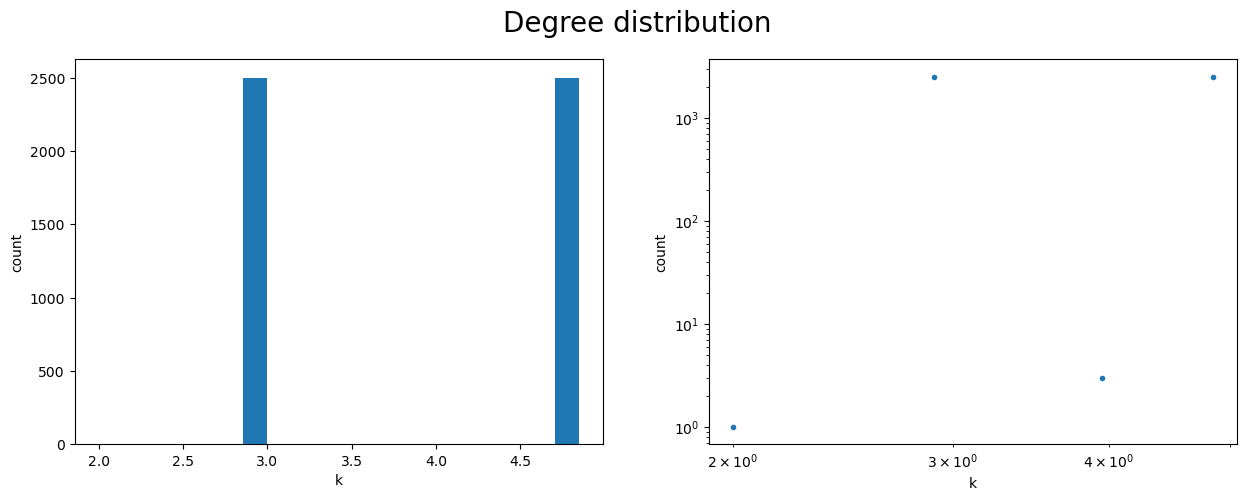

In [42]:
degree_distribution_plot(dict(G.degree).values(), title='Degree distribution', n_bins=20, figsize=(15,5))

> **Solution**: The theoretical sum of node degrees should be 20000, but it's 19996 because there's 2 loops (which mean 1 degree less for each loop) and 1 multilink (which means 2 degrees less, because it takes away 1 edge from 2 nodes). This is only because a *nx.Graph* object doesn't accept multilinks, but if we try the same with *nx.Multigraphs*, the real and theoretical degree sum is the same.
When speaking about the degree distribution, we can see that there are 4 nodes with one less adjacent node than they should have, for the same reasons as previously explained.